## 房屋資料抓取

In [4]:
import requests
headers = {
 'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_13_6) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/69.0.3497.100 Safari/537.36'   
}
res = requests.get('https://sale.591.com.tw/home/search/list?type=2&&shType=list&section=7&regionid=1&kind=9&firstRow=30&totalRows=2404&timestamp=1539754751297', headers = headers)

In [5]:
res

<Response [200]>

In [11]:
import pandas
pandas.DataFrame(res.json()['data']['house_list']).head(3)

,address,area,browsenum,cartmodel,carttype,community_link,community_name,delivery,down_price_percent,fci_pai,...,saletype,section_name,shape_name,showhouseage,showprice,tag,title,type,unit_price,unitprice
0,忠孝東路五段31巷,15.16,382,,,/newCommunity-index.html?cid=50519,無爭,,NaN,,...,0,信義區,電梯大樓,10年,"1,790",[],市府極美無爭精品,2,118.07萬/坪,118.07
1,忠孝東路五段743巷,32.56,606,,,/newCommunity-index.html?cid=93550,達麗信義,,NaN,,...,0,信義區,電梯大樓,3年,"2,600","[含車位, 有陽台]",指名承辦人小鍾：本棟最低總價！精緻裝潢！,2,114.77萬/坪,114.77
2,松山路,20.68,720,,,/newCommunity-index.html?cid=6751,永春大樓,,NaN,,...,0,信義區,電梯大樓,34年,"1,220",[有陽台],專售永春大樓-住商住匠團隊,2,58.99萬/坪,58.99


In [14]:
import time
houseurl = 'https://sale.591.com.tw/home/search/list?type=2&&shType=list&section=7&regionid=1&kind=9&firstRow={}&totalRows=2404&timestamp=1539754751297'

houseary = []
for i in range(0,int(2404 / 30)+ 1 ):
    res = requests.get(houseurl.format(i*30), headers = headers)
    df = pandas.DataFrame(res.json()['data']['house_list'])
    houseary.append(df)
    time.sleep(1)
    print(i)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80


In [15]:
housedf = pandas.concat(houseary)

In [17]:
housedf.count()

address                 2403
area                    2405
browsenum               2405
build_purpose              2
call_num                   2
cartmodel               2403
carttype                2403
community_link          2403
community_name          2403
company                    2
delivery                2403
down_price_percent        35
fci_pai                 2403
floor                   2403
has_carport             2403
houseage                2405
houseid                 2405
is_carport              2403
is_combine              2403
is_down_price           2403
is_full                    2
is_hurry_price          2403
is_newhouse                2
is_oversea              2403
is_pro_advertisement       2
is_video                2403
isnew                   2403
isvip                   2403
kind                    2403
kind_name               2403
label                      2
mainarea                2403
nick_name               2403
original_price            35
phonenum      

In [18]:
housedf.to_excel('house591.xlsx')

## 房屋資料清理

In [47]:
import pandas
housedf  = pandas.read_excel('https://raw.githubusercontent.com/ywchiu/chinalife/master/data/house591.xlsx')

In [48]:
housedf.iloc[2]

address                                                            忠孝東路五段
area                                                                41.17
browsenum                                                             180
build_purpose                                                         NaN
call_num                                                              NaN
cartmodel                                                             NaN
carttype                                                              NaN
community_link                          /newCommunity-index.html?cid=6305
community_name                                                       春秋大廈
company                                                               NaN
delivery                                                              NaN
down_price_percent                                                    NaN
fci_pai                                                               NaN
floor                                 

In [49]:
housedf = housedf[['area', 'room','floor','price','houseage']]

In [50]:
housedf[['bedroom', 'livingroom', 'bathroom']] = housedf['room'].str.extract('(\d+)房(\d+)廳(\d+)衛')

/Users/davidchiu/.pyenv/versions/3.6.2/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  """Entry point for launching an IPython kernel.


In [51]:
housedf[['current_floor', 'total_floor']] = housedf['floor'].str.extract('(\d+)F/(\d+)F')

/Users/davidchiu/.pyenv/versions/3.6.2/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  """Entry point for launching an IPython kernel.


In [52]:
del housedf['room']
del housedf['floor']

In [53]:
housedf.dropna(inplace=True)

In [54]:
housedf.head()

,area,price,houseage,bedroom,livingroom,bathroom,current_floor,total_floor
2,41.17,3988,35,4,2,2,8,14
3,15.76,1180,44,2,1,1,3,4
6,106.74,11500,4,4,2,3,7,12
7,15.39,1520,19,1,1,1,4,14
8,53.39,3850,29,2,2,2,8,15


In [55]:
housedf.columns

Index(['area', 'price', 'houseage', 'bedroom', 'livingroom', 'bathroom',
       'current_floor', 'total_floor'],
      dtype='object')

In [59]:
Y = housedf['price'].values
X = housedf[['area', 'bedroom', 'livingroom', 'bathroom', 'current_floor',
       'total_floor', 'houseage']]

In [60]:
X['total_floor'] = X['total_floor'].astype(float)
X['bedroom'] = X['bedroom'].astype(float)
X['livingroom'] = X['livingroom'].astype(float)
X['bathroom'] = X['bathroom'].astype(float)
X['current_floor'] = X['current_floor'].astype(float)

/Users/davidchiu/.pyenv/versions/3.6.2/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/davidchiu/.pyenv/versions/3.6.2/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/davidchiu/.pyenv/versions/3.6.2/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexe

## 資料分析

In [61]:
import statsmodels.api as sm
X2  = sm.add_constant(X)
est = sm.OLS(Y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.890
Model:                            OLS   Adj. R-squared:                  0.889
Method:                 Least Squares   F-statistic:                     2502.
Date:                Wed, 17 Oct 2018   Prob (F-statistic):               0.00
Time:                        14:18:00   Log-Likelihood:                -18696.
No. Observations:                2177   AIC:                         3.741e+04
Df Residuals:                    2169   BIC:                         3.745e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -1096.2896    137.992     -7.945

In [62]:
predictorcols = X.columns

In [64]:
import itertools
AICs = {}
for k in range(1,len(predictorcols)+1):
    for variables in itertools.combinations(predictorcols, k):
        predictors = X[list(variables)]
        predictors2 = sm.add_constant(predictors)
        est = sm.OLS(Y, predictors2)
        res = est.fit()
        AICs[variables] = res.aic

In [70]:
from collections import Counter
c = Counter(AICs)
c.most_common()[::-1][0:3]

[(('area', 'bedroom', 'bathroom', 'current_floor', 'total_floor', 'houseage'),
  37407.03375336106),
 (('area',
   'bedroom',
   'livingroom',
   'bathroom',
   'current_floor',
   'total_floor'),
  37407.10172648925),
 (('area', 'bedroom', 'bathroom', 'current_floor', 'total_floor'),
  37407.16576925829)]

In [63]:
import itertools
for variables in itertools.combinations(predictorcols, 4):
    print(variables)

('area', 'bedroom', 'livingroom', 'bathroom')
('area', 'bedroom', 'livingroom', 'current_floor')
('area', 'bedroom', 'livingroom', 'total_floor')
('area', 'bedroom', 'livingroom', 'houseage')
('area', 'bedroom', 'bathroom', 'current_floor')
('area', 'bedroom', 'bathroom', 'total_floor')
('area', 'bedroom', 'bathroom', 'houseage')
('area', 'bedroom', 'current_floor', 'total_floor')
('area', 'bedroom', 'current_floor', 'houseage')
('area', 'bedroom', 'total_floor', 'houseage')
('area', 'livingroom', 'bathroom', 'current_floor')
('area', 'livingroom', 'bathroom', 'total_floor')
('area', 'livingroom', 'bathroom', 'houseage')
('area', 'livingroom', 'current_floor', 'total_floor')
('area', 'livingroom', 'current_floor', 'houseage')
('area', 'livingroom', 'total_floor', 'houseage')
('area', 'bathroom', 'current_floor', 'total_floor')
('area', 'bathroom', 'current_floor', 'houseage')
('area', 'bathroom', 'total_floor', 'houseage')
('area', 'current_floor', 'total_floor', 'houseage')
('bedroom'

## 連線資料庫

In [71]:
import sqlite3 as lite
con = lite.connect('test.sqlite')
cur = con.cursor()
cur.execute('SELECT SQLITE_VERSION()')
data = cur.fetchone()
con.close()

In [72]:
data

('3.19.3',)

In [73]:
import sqlite3 as lite
with lite.connect('test.sqlite') as con:
    cur = con.cursor()
    cur.execute('SELECT SQLITE_VERSION()')
    data = cur.fetchone()
#con.close()

In [74]:
data

('3.19.3',)

In [75]:
import sqlite3 as lite 
with lite.connect("test.sqlite") as con: 
    cur = con.cursor() 
    cur.execute("DROP TABLE IF EXISTS PhoneAddress") 
    cur.execute("""CREATE TABLE PhoneAddress(
                    phone CHAR(10) PRIMARY KEY, 
                    address TEXT, 
                    name TEXT unique, 
                    age INT NOT NULL)""") 
    cur.execute("INSERT INTO PhoneAddress VALUES('0912173381','United State','Jhon Doe',53)") 
    cur.execute("INSERT INTO PhoneAddress VALUES('0928375018','Tokyo Japan','MuMu Cat',6)") 
    cur.execute("INSERT INTO PhoneAddress VALUES('0957209108','Taipei','Richard',29)") 


In [77]:
import sqlite3 as lite 
with lite.connect("test.sqlite") as con: 
    cur = con.cursor() 
    cur.execute("SELECT phone, address from PhoneAddress")
    data = cur.fetchall()

In [78]:
data

[('0912173381', 'United State'),
 ('0928375018', 'Tokyo Japan'),
 ('0957209108', 'Taipei')]

## Python and SQLServer


In [79]:
import sqlite3 as lite 
with lite.connect("test.sqlite") as con: 
    cur = con.cursor() 
    cur.execute("SELECT phone, address from PhoneAddress")
    data1 = cur.fetchone()
    data2 = cur.fetchall()

In [80]:
data1

('0912173381', 'United State')

In [81]:
data2

[('0928375018', 'Tokyo Japan'), ('0957209108', 'Taipei')]

In [82]:
import sqlite3 as lite
import pandas
employee = [{'name':'Mary', 'age':23 , 'gender': 'F'},{'name':'John', 'age':33 , 'gender': 'M'}]
df = pandas.DataFrame(employee)
df

,age,gender,name
0,23,F,Mary
1,33,M,John


In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 3 columns):
age       2 non-null int64
gender    2 non-null object
name      2 non-null object
dtypes: int64(1), object(2)
memory usage: 128.0+ bytes


In [85]:
with lite.connect('test.sqlite') as db:
    df.to_sql(name='employee', index=False, con=db, if_exists='replace')


## 儲存實例

In [86]:
import pandas
housedf  = pandas.read_excel('https://raw.githubusercontent.com/ywchiu/chinalife/master/data/house591.xlsx')

In [88]:
housedf = housedf[['area', 'room','floor','price','houseage']]

In [90]:
housedf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2405 entries, 0 to 2
Data columns (total 5 columns):
area        2405 non-null float64
room        2405 non-null object
floor       2402 non-null object
price       2405 non-null int64
houseage    2405 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 112.7+ KB


In [91]:
with lite.connect('house.sqlite') as con:
    housedf.to_sql('house591', con = con)

In [93]:
with lite.connect('house.sqlite') as con:
    df = pandas.read_sql_query('select * from house591 limit 3', con = con)

In [94]:
df

,index,area,room,floor,price,houseage
0,0,75.00,3~4房,None,9000,0
1,1,46.42,開放式格局,9F/13F,4380,12
2,2,41.17,4房2廳2衛,8F/14F,3988,35


In [96]:
with lite.connect('house.sqlite') as con:
    df = pandas.read_sql_query('select avg(price) from house591', con = con)

In [97]:
df

,avg(price)
0,3706.310187


In [98]:
with lite.connect('house.sqlite') as con:
    df = pandas.read_sql_query('select avg(price/area) from house591', con = con)

In [99]:
df

,avg(price/area)
0,87.765449


## SQLAlchemy and SQLServer 
- https://docs.sqlalchemy.org/en/latest/core/engines.html

## 三大法人日報
- http://www.twse.com.tw/zh/page/trading/fund/T86.html

In [100]:
import requests
res = requests.get('http://www.twse.com.tw/fund/T86?response=json&date=20181016&selectType=ALL&_=1539761083842')

In [103]:
import pandas
df = pandas.DataFrame(res.json()['data'])

In [105]:
df.columns = res.json()['fields']

In [107]:
with lite.connect('test.sqlite') as con:
    df.to_sql('bigthree', con = con)

## 抓取公開資訊觀測站歷年變更登記

In [113]:
import requests
from bs4 import BeautifulSoup
payload = {
'encodeURIComponent': '1',
'step': '1',
'firstin': '1',
'off': '1', 
'queryName': 'co_id',
'inpuType': 'co_id',
'TYPEK': 'all',
'co_id': '2823'    
}
res  = requests.post('http://mops.twse.com.tw/mops/web/ajax_t05st05', data = payload)
soup = BeautifulSoup(res.text, 'lxml')

In [118]:
payload2 = {}
for item in soup.select_one('form').select('input[type=hidden]'):
    if item.get('value'):
        payload2[item.get('name')] = item.get('value')
payload2

{'TYPEK': 'sii', 'co_id': '2823', 'firstin': 'true', 'off': '1', 'step': '2'}

In [119]:
payload2['year'] = '1994'
payload2['month'] = '10'

In [120]:
res = requests.post('http://mops.twse.com.tw/mops/web/ajax_t05st05', data = payload2)
res

<Response [200]>

In [123]:
dfs = pandas.read_html(res.text)
dfs[1]

,0,1,2,3,4
0,是否係申報首次公開發行之輸入：,NaN,NaN,NaN,NaN
1,每 股 面 額,10.0000,變 更 公 司 執 照 時 間,83年,10月
2,核定股本股數(股),250000000,核定股本金額(元),2500000000,NaN
3,實收股本股數 (股),212875000,實收股本金額(元),2128750000,NaN
4,股本來源(元),1.創 立 時 資 本,20000000,2.現金增資,765600000
5,3.資本公積轉增資,250275000,4.盈餘轉增資,1064875000,NaN
6,5.證期局核准資本公積之日期,NaN,6.證期局核准盈餘轉增資之日期,NaN,NaN
7,7.合併增資(元),0,8.減資(元),0,NaN
8,9.證期局核准合併增資之日期,NaN,10.證期局核准減資之日期,NaN,NaN
9,11.其他,員工紅利轉增資:28000000,NaN,NaN,NaN


## 取得盤後交易資訊

## Rate Limiting
- https://www.nginx.com/blog/rate-limiting-nginx/

In [126]:
import requests
import time
for i in range(1,10):
    res = requests.get('http://www.twse.com.tw/exchangeReport/MI_INDEX?response=json&date=&type=&_=1539763053868')
    time.sleep(3)
    print(res)
#res.json()

<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>


## Proxy Rotate

In [135]:
import requests
headers = {
 'user-agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_13_6) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/69.0.3497.100 Safari/537.36',  
 'origin': 'https://www.whatismyip.com',
 'referer': 'https://www.whatismyip.com/'   
}

proxies = {
  'http': 'http://196.17.26.204:8800',
  'https': 'http://196.17.26.204:8800',
}
res = requests.get('https://ipv4.whatismyip.com/', headers = headers, proxies = proxies)
res.text

'196.17.26.204'

In [136]:
import requests
payload = {
'TYPEK': 'all',
'step': '0',
'stp': '1',
'firstin': 'true', 
'newstuff': '1'    
}
res = requests.post('http://mops.twse.com.tw/mops/web/t05sr01_1', data = payload)

In [171]:
soup = BeautifulSoup(res.text, 'lxml')
payload2  = {}
for item in soup.select_one('form[name="fm_t05sr01_1"]').select('input[type=hidden]'):
    if item.get('value'):
        payload2[item.get('name')] = item.get('value')

In [ ]:
from bs4 import BeautifulSoup
def getDetail(payload):
    res2 = requests.post('http://mops.twse.com.tw/mops/web/ajax_t05sr01_1', data = payload)
    soup2 = BeautifulSoup(res2.text, 'lxml')
    #print(res2.text)
    return soup2.select_one('pre').text

In [182]:
for rec in soup.select('input[value="詳細資料"]'):
    newpayload = payload2
    for item in rec.get('onclick').split(';'):
        if 'document' in item:
            if 'name' not in item.lower():
                key, value = item.replace('document.fm_t05sr01_1.', '').replace('.value', '').split('=')
                newpayload[key] = value.replace("'",'')
    #print(newpayload)
    news = getDetail(newpayload)
    print(news)
    break
    #print(news)

<pre style="font-family:細明體; !important;">1.事實發生日:107/10/17
2.被背書保證之:
(1)公司名稱:聯佳股份有限公司
(2)與提供背書保證公司之關係:
本公司直接持有100%之公司
(3)背書保證之限額(仟元):1075946
(4)原背書保證之餘額(仟元):417393
(5)本次新增背書保證之金額(仟元):43857
(6)迄事實發生日止背書保證餘額(仟元):461250
(7)被背書保證公司實際動支金額(仟元):278539
(8)本次新增背書保證之原因:
融資背書保證
3.被背書保證公司提供擔保品之:
(1)內容:
無
(2)價值(仟元):0
4.被背書保證公司最近期財務報表之:
(1)資本(仟元):541713
(2)累積盈虧金額(仟元):31265
5.解除背書保證責任之:
(1)條件:
借款全部清償後
(2)日期:
依合約到期日
6.背書保證之總限額(仟元):
1075946
7.迄事實發生日為止，背書保證餘額(仟元):
461250
8.迄事實發生日為止，A提供背書保證餘額占公開發行公司最近期財務報表淨值之
比率:
64.30
9.迄事實發生日為止，背書保證、長期投資及資金貸與餘額合計數達該公開發行公
司最近期財務報表淨值之比率:
140.75
10.其他應敘明事項:
無</pre>
None


## 工作排程
- Windows: 工作排程器
- Linux/Mac: crontab
- http://linux.vbird.org/linux_basic/0430cron.php

## PTT 爬蟲

In [187]:
import requests
cookies = {
    'over18': '1' 
}
res = requests.get('https://www.ptt.cc/bbs/Gossiping/M.1477049256.A.CEF.html', cookies = cookies)

In [189]:
#res.text

## 財報狗一

In [192]:
import requests
headers = {
  'Cookie': 'buuid=aEo3V1FLd3VQVytFRm5zUFJRa1J6YmIyRExsNHIzK2lMZURZWlB1bFQrQ1Zsa29oQTBDL3JyT3VsaEZZRExCWS0taDc3bFRGSUZDQjE4L1hKYnZIbVp3QT09--5c11ea3ba1ae9537ca134d9ce9dd0a93c94cae2f; easy_ab=04b5476a-f31e-415a-85f6-2444978be5a8; _ga=GA1.2.1476840361.1539768313; _gid=GA1.2.1539189090.1539768313; upgrade_browser=1; intercom-id-d5wdetwg=443922d8-11ba-4e97-9be1-0ad7225b9132; remember_user_token=W1szMTI2ODVdLCIkMmEkMTAkNWJqZGpkaVdubDRVY3JDdC5BQVJLdSIsIjE1Mzk3Njg4MDYuMTczNDIzMyJd--622b210368f395bfc55b38b965e75359babc5702; mp_distinct_id=312685; intercom-session-d5wdetwg=eFRMdmZKK2FnZ0pXRzlnRWVmQUgwQ3pSTGZaQmJwa1VlRWRvV2pXM2tpYWh1NVlsamUxMnlhTVhweHZ1ZGJQVS0tMDl5TVdBdkRYZUZ5YzBzRVI3RHRjZz09--f8d0aed123249329c99c02ebff9c204b2b381131; _statementdog_session_v2=YVBaQU1VSG9EK0R6UG9XNlRVVVU1eDhBSWtDY3l1OVJiaFdKZ3hsREs3VzRQT2hIaWZiK0txdUlvYkdZdmovUmFkd2dxK0daZDJFeXNPcTVGWFY1L21Cb3hlTFlzcklKVFQwcE9lcTFFa25HV0JmZzlDK1h2cmZOM09ZMGVKdk9kNzV3QVlCYUlnQ3FKdU5hbTFmYjduV2FhYXZEQTNlcCtFUzJsRFJIY0NoUURoNHo4ZGMxOTJ6TVlNcXhHN1pzZkM2aWd0OGlwMStVNXhIM2dqdk5uS24xb00ybTdKSmEvZXovMzFFWW12eWpyU05XRjlETmc5Z2Y2c2t6Zk1NZS0tUXVnZWdtZDlVcHRKZGNJRmtzUFN0UT09--1a7c1fd5b90f61d0d7b8693eddc548755ee4d188; mp_2fc60276bfe20ef798d15c46e498d765_mixpanel=%7B%22distinct_id%22%3A%20%22312685%22%2C%22%24search_engine%22%3A%20%22google%22%2C%22%24initial_referrer%22%3A%20%22https%3A%2F%2Fwww.google.com.tw%2F%22%2C%22%24initial_referring_domain%22%3A%20%22www.google.com.tw%22%7D; amplitude_id_0ab77a441fbc226251ef1a272380fcd7statementdog.com=eyJkZXZpY2VJZCI6ImYyYzliZGM5LWNhMDAtNGE5MC04NTk2LThhNjRiZGY2ZDViNVIiLCJ1c2VySWQiOiIzMTI2ODUiLCJvcHRPdXQiOmZhbHNlLCJzZXNzaW9uSWQiOjE1Mzk3NjgzMTI1OTgsImxhc3RFdmVudFRpbWUiOjE1Mzk3Njg5MjQ4NTYsImV2ZW50SWQiOjEyLCJpZGVudGlmeUlkIjoxMywic2VxdWVuY2VOdW1iZXIiOjI1fQ=='  
}
res = requests.get('https://statementdog.com/users/account', headers = headers)
#res.text

## 財報狗二

In [201]:
import requests
from bs4 import BeautifulSoup
rs  = requests.session()
res = rs.get('https://statementdog.com/users/sign_in')
soup = BeautifulSoup(res.text, 'lxml')
payload = {}
for ele in soup.select('input[type=hidden]'):
    if ele.get('value'):
        payload[ele.get('name')] = ele.get('value')

In [202]:
payload

{'authenticity_token': 'UA7cD98OSKK6G4RboX+emdamnQWAN9BGUORGAtzb0lKJJZc9mUJFMNd4DOPxvH90jIOPaYjYsVdN1O9R4iw2Rg==',
 'user[remember_me]': '1',
 'utf8': '✓'}

In [203]:
payload['user[email]'] = 'doma@oranek.com'
payload['user[password]'] = '1qaz2wsx'

In [204]:
res2 = rs.post('https://statementdog.com/users/sign_in', data = payload)


In [205]:
res3 = rs.get('https://statementdog.com/users/account')


In [207]:
#res3.text

## Selenium
- ! pip install selenium
- https://chromedriver.storage.googleapis.com/2.43/chromedriver_win32.zip

In [208]:
! pip install selenium

You are using pip version 9.0.1, however version 18.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [217]:
from selenium import webdriver
driver = webdriver.Chrome('/opt/local/common/chromedriver')
driver.get('https://www.google.com')
driver.find_element_by_css_selector('input[name=q]').send_keys('中國人壽')
driver.find_element_by_css_selector('input[name=q]').submit()

In [216]:
driver.close()

In [218]:
from selenium import webdriver
driver = webdriver.Chrome('/opt/local/common/chromedriver')
driver.get('https://statementdog.com/users/sign_in')


In [219]:
driver.find_element_by_css_selector('#user_email').send_keys('doma@oranek.com')

In [220]:
driver.find_element_by_css_selector('#user_password').send_keys('1qaz2wsx')

In [221]:
driver.find_element_by_css_selector('button.submit-btn').click()

In [224]:
payload = {}
for rec in driver.get_cookies():
    payload[rec.get('name')] = rec.get('value') 

In [228]:
headers = {
'Cookie':';'.join(['{}={}'.format(key, payload.get(key)) for key in payload])
}

In [231]:
res = requests.get('https://statementdog.com/users/account', headers = headers)
#res.text

In [232]:
from selenium import webdriver
driver = webdriver.Chrome('/opt/local/common/chromedriver')
driver.get('https://irs.thsrc.com.tw/IMINT/?locale=tw')



In [234]:
driver.find_element_by_css_selector('select[name=selectStartStation]').send_keys('台北')

In [235]:
driver.find_element_by_css_selector('select[name=selectDestinationStation]').send_keys('嘉義')

In [236]:
driver.find_element_by_css_selector('select[name=toTimeTable]').send_keys('19:00')

In [242]:
driver.find_element_by_link_text('語音播放').click()

In [255]:
import speech_recognition
r = speech_recognition.Recognizer()

voice = speech_recognition.AudioFile('/Users/davidchiu/Downloads/PronounceRandonNumber.wav')
with voice as source:
    audio = r.record(source)

captcha = r.recognize_google(audio, language='zh_TW')

In [256]:
captcha

'677'

In [334]:
import requests
from bs4 import BeautifulSoup
headers = {
    'User-Agent':'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/48.0.2564.116 Safari/537.36'
}
rs = requests.session()
res = rs.get('http://bsr.twse.com.tw/bshtm/bsMenu.aspx', headers = headers)
res.encoding = 'utf-8'
soup = BeautifulSoup(res.text, 'lxml')

In [335]:
payload = {}
for item in soup.select('input[type=hidden]'):
    if item.get('value'):
        payload[item.get('name')] = item.get('value')

In [336]:
payload

{'__EVENTVALIDATION': '/wEdAAYl7P0sJw/thWoueWGMkddYfMmuxAJNAJcNkRRsVeJwwqKURZav/+YrVMqaWE2hvMxJwK4Ohf3nRgXHkFhQen1PRSciNdPYWmINCrip1wqw01PJCA0uL9aE2sjICZqv6Go36hbtMO/w7gYRvD6ADKTb',
 '__VIEWSTATE': '/wEPDwUJOTAxMjkxMjg3D2QWAgIDD2QWBAIBD2QWAmYPZBYEZg9kFgJmDxAPFgYeB0NoZWNrZWRnHglGb3JlQ29sb3IKAB4EXyFTQgIEZGRkZAIBD2QWAgIBDw8WBB8BCgAfAgIEZGQCAw9kFgQCAw8PFgIeBFRleHRlZGQCCQ8PFgIeB1Zpc2libGVoZGQYAgUeX19Db250cm9sc1JlcXVpcmVQb3N0QmFja0tleV9fFgMFElJhZGlvQnV0dG9uX05vcm1hbAUQUmFkaW9CdXR0b25fRXhjZAUQUmFkaW9CdXR0b25fRXhjZAUPQ2FwdGNoYUNvbnRyb2wxDwUkYmM5MTczZTctY2RmMC00OGNiLTkyZTAtZDc5ZWM3OGFkZjZiZA7vPh0tidrjx58jtqQ/Go0=',
 '__VIEWSTATEGENERATOR': 'AA1F01CB'}

In [337]:
soup.select_one('#Panel_bshtm img')

<img border="0" height="60" src="CaptchaImage.aspx?guid=bc9173e7-cdf0-48cb-92e0-d79ec78adf6b" width="200"/>

In [338]:
domain = 'http://bsr.twse.com.tw/bshtm/'
res2 = rs.get(domain + soup.select_one('#Panel_bshtm img')['src'])
with open('captcha.jpg', 'wb') as f:
    f.write(res2.content)

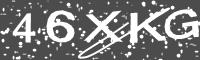

In [339]:
from PIL import Image
Image.open('captcha.jpg')

In [340]:
payload['TextBox_Stkno'] = 2330
#payload['CaptchaControl1'] = '6KJRD'
payload['__EVENTTARGET'] =''
payload['__EVENTARGUMENT'] =''
payload['__LASTFOCUS'] =''
payload['RadioButton_Normal'] ='RadioButton_Normal'
payload['btnOK'] = '查詢'


In [341]:
res3 = rs.post('http://bsr.twse.com.tw/bshtm/bsMenu.aspx', data = payload, headers = headers)

In [346]:
res4 = rs.get('http://bsr.twse.com.tw/bshtm/bsContent.aspx', headers = headers)
#print(res4.text)